In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
df = pd.read_csv(r"D:\Data science\resume_screening_app\data\archive\UpdatedResumeDataSet.csv")

In [8]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


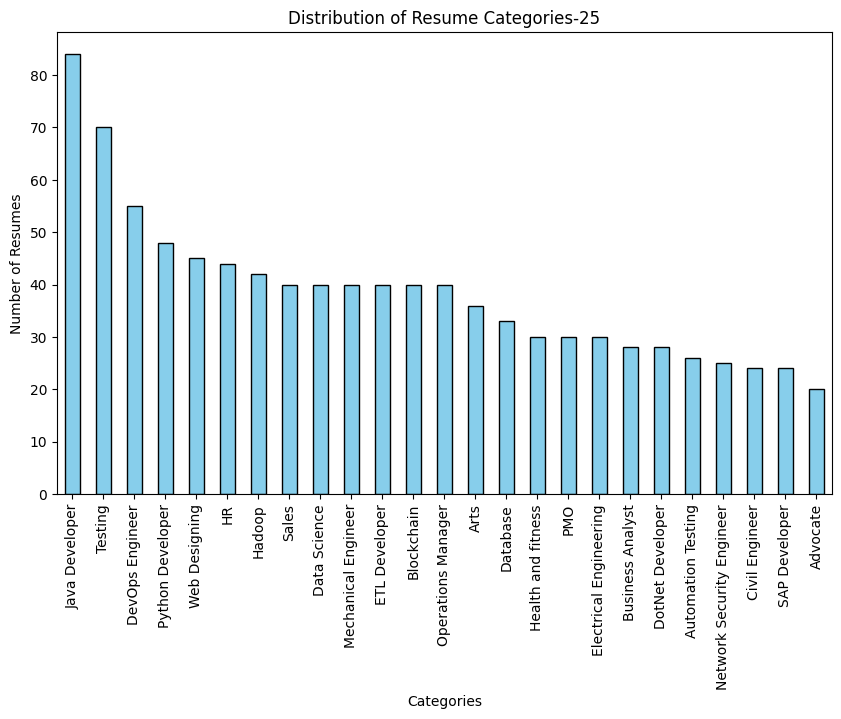

In [33]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', title=f'Distribution of Resume Categories-{unique}', xlabel='Categories', ylabel='Number of Resumes')

plt.show()

In [34]:
unique = df['Category'].nunique()

Average Resume Length by Category: Category
Operations Manager           12025.250000
PMO                           5414.333333
Business Analyst              4944.428571
Network Security Engineer     4168.600000
Automation Testing            4163.769231
DevOps Engineer               3996.745455
Database                      3873.909091
SAP Developer                 3769.000000
ETL Developer                 3557.600000
Hadoop                        3551.428571
Data Science                  3213.100000
Mechanical Engineer           3142.200000
Civil Engineer                3069.166667
Web Designing                 2980.800000
DotNet Developer              2786.571429
Electrical Engineering        2545.000000
Arts                          2293.500000
Blockchain                    2290.200000
Health and fitness            1886.666667
Testing                       1869.428571
Python Developer              1791.000000
Sales                         1670.200000
Java Developer                16

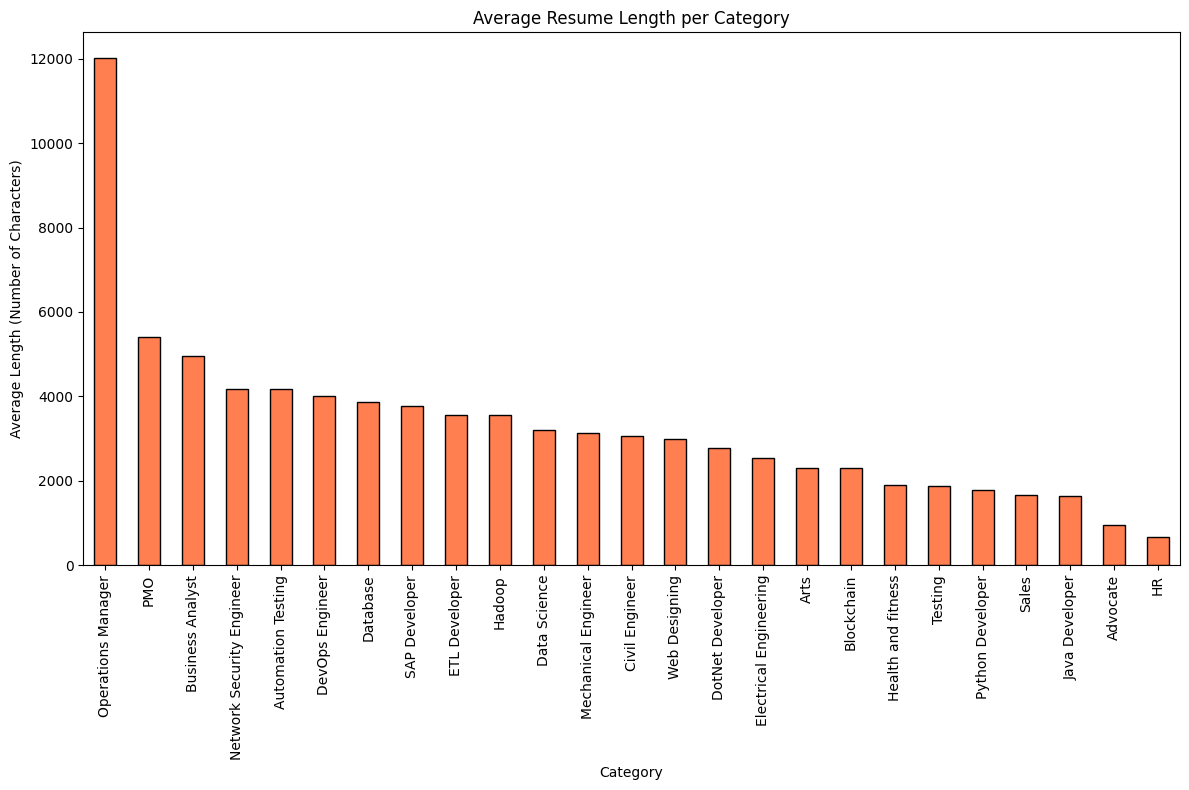

In [38]:
df['resume_length'] = df['Resume'].str.len()
avg_resume_length = df.groupby('Category')['resume_length'].mean().sort_values(ascending=False)

print("Average Resume Length by Category:",avg_resume_length)

plt.figure(figsize=(12, 8))
avg_resume_length.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Resume Length per Category')
plt.xlabel('Category')
plt.ylabel('Average Length (Number of Characters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CLEANING THE DATA


In [40]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [41]:
cleaned_resumes = df['Resume'].apply(clean_text)

In [43]:
df['Resume'] = df['Resume'].apply(clean_text)

In [44]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review process a

In [50]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Resume'] = df['Resume'].apply(lambda x:remove_stopwords(x))

print("First resume after stopword removal:")
df['Resume'][0]

First resume after stopword removal:


'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naãve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch djs dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run analytics gener

ENCODING THE CATEGORY COLUMN


In [52]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [54]:
df.head()

,Category,Resume,resume_length
0,6,skills programming languages python pandas num...,4786
1,6,education details may may uitrgpv data scienti...,1268
2,6,areas interest deep learning control system de...,1871
3,6,skills â r â python â sap hana â tableau â sap...,6995
4,6,education details mca ymcaust faridabad haryan...,452


In [56]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Resume']).toarray()
y = df['Category']

In [57]:
X.shape, y.shape

((962, 5000), (962,))

TRAIN_TEST_SPLIT

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 5000), (193, 5000), (769,), (193,))

MODEL BUILDING

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
from sklearn.multiclass import OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(knn_classifier)
ovr_classifier.fit(X_train, y_train)
y_pred_knn = ovr_classifier.predict(X_test)
print("K-Nearest Neighbors Classifier Performance:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00    

In [63]:
print("accuracy_score:",accuracy_score(y_test, y_pred_knn))

accuracy_score: 0.9844559585492227


In [64]:
test_resume = """
John Doe
Data Scientist
(123) 456-7890 | john.doe@email.com | linkedin.com/in/johndoe | github.com/johndoe

Summary
Highly motivated and detail-oriented Data Scientist with 3 years of experience in developing machine learning models, performing statistical analysis, and creating data visualizations to drive business decisions. Proficient in Python, R, SQL, and various data science libraries.

Skills
- Programming Languages: Python, R, SQL
- Libraries & Frameworks: Pandas, NumPy, Scikit-learn, TensorFlow, Keras, Matplotlib, Seaborn
- Databases: PostgreSQL, MySQL, MongoDB
- Tools: Git, Docker, Jupyter Notebook, Tableau
- Machine Learning: Regression, Classification, Clustering, Natural Language Processing (NLP), Time Series Analysis

Experience
Data Scientist | ABC Corp | Anytown, USA | June 2022 - Present
- Developed and deployed a customer churn prediction model using logistic regression and random forests, resulting in a 15% reduction in churn.
- Built NLP models to analyze customer feedback, identifying key areas for product improvement.
- Created interactive dashboards in Tableau to track key performance indicators (KPIs) for the marketing team.

Projects
Sales Forecasting Model
- Developed a time series model using ARIMA to forecast monthly sales with 95% accuracy.
- Cleaned and preprocessed historical sales data to handle missing values and outliers.
- The model helped the inventory management team optimize stock levels.

Education
Master of Science in Data Science
State University | Graduated May 2022

Bachelor of Science in Computer Science
Tech Institute | Graduated May 2020
"""

print("Sample resume created and stored in 'test_resume' variable.")


Sample resume created and stored in 'test_resume' variable.


In [66]:
import pickle 
pickle.dump(ovr_classifier, open(r"D:\Data science\resume_screening_app\models\ovr_model.pkl", 'wb'))
pickle.dump(tfidf_vectorizer, open(r"D:\Data science\resume_screening_app\models\tfidf_vectorizer.pkl", 'wb'))

In [73]:
pickle.dump(le, open(r"D:\Data science\resume_screening_app\models\label_encoder.pkl", 'wb'))

In [65]:
test_resume

'\nJohn Doe\nData Scientist\n(123) 456-7890 | john.doe@email.com | linkedin.com/in/johndoe | github.com/johndoe\n\nSummary\nHighly motivated and detail-oriented Data Scientist with 3 years of experience in developing machine learning models, performing statistical analysis, and creating data visualizations to drive business decisions. Proficient in Python, R, SQL, and various data science libraries.\n\nSkills\n- Programming Languages: Python, R, SQL\n- Libraries & Frameworks: Pandas, NumPy, Scikit-learn, TensorFlow, Keras, Matplotlib, Seaborn\n- Databases: PostgreSQL, MySQL, MongoDB\n- Tools: Git, Docker, Jupyter Notebook, Tableau\n- Machine Learning: Regression, Classification, Clustering, Natural Language Processing (NLP), Time Series Analysis\n\nExperience\nData Scientist | ABC Corp | Anytown, USA | June 2022 - Present\n- Developed and deployed a customer churn prediction model using logistic regression and random forests, resulting in a 15% reduction in churn.\n- Built NLP models t

In [68]:
model = pickle.load(open(r"D:\Data science\resume_screening_app\models\ovr_model.pkl", 'rb'))
vectorizer = pickle.load(open(r"D:\Data science\resume_screening_app\models\tfidf_vectorizer.pkl", 'rb'))
test_resume_cleaned = clean_text(test_resume)
test_resume_no_stopwords = remove_stopwords(test_resume_cleaned)
test_resume_vectorized = vectorizer.transform([test_resume_no_stopwords]).toarray()
predicted_category = model.predict(test_resume_vectorized)
category_label = le.inverse_transform(predicted_category)
print("Predicted Category for the test resume:", category_label[0])


Predicted Category for the test resume: Data Science


In [69]:
test_resume_java = """
Jane Smith
Java Developer
(987) 654-3210 | jane.smith@email.com | linkedin.com/in/janesmith | github.com/janesmith

Summary
Experienced Java Developer with over 5 years of hands-on experience in designing, developing, and implementing applications using Java and J2EE. Proven expertise in Spring Framework, Hibernate, and building RESTful web services. A strong team player with a knack for problem-solving and writing clean, efficient code.

Skills
- Programming Languages: Java, Python, SQL
- Frameworks: Spring Boot, Spring MVC, Hibernate, JUnit
- Web Technologies: HTML, CSS, JavaScript, JSP, Servlets
- Databases: Oracle, MySQL, PostgreSQL
- Tools: Maven, Git, Jenkins, Docker, Eclipse, IntelliJ IDEA
- Web Services: REST, SOAP

Experience
Senior Java Developer | XYZ Solutions | Sometown, USA | Jan 2021 - Present
- Led the development of a new microservices-based e-commerce platform using Spring Boot, resulting in a 40% improvement in performance.
- Designed and developed RESTful APIs for various services, ensuring seamless integration between the front-end and back-end systems.
- Mentored junior developers, conducted code reviews, and enforced best practices for software development.

Java Developer | Tech Innovators Inc. | Anytown, USA | May 2018 - Dec 2020
- Developed and maintained several enterprise-level web applications using Spring MVC and Hibernate.
- Wrote unit and integration tests using JUnit and Mockito to ensure code quality and reliability.
- Collaborated with a team of developers in an Agile environment to deliver new features and bug fixes.

Education
Bachelor of Engineering in Information Technology
University of Technology | Graduated May 2018
"""

print("Sample Java Developer resume created and stored in 'test_resume_java' variable.")


Sample Java Developer resume created and stored in 'test_resume_java' variable.


In [ ]:
cleaned_java = clean_text(test_resume_java)
java_no_stopwords = remove_stopwords(cleaned_java)
java_vectorized = vectorizer.transform([java_no_stopwords]).toarray()
predicted_java_category = model.predict(java_vectorized)
java_category_label = le.inverse_transform(predicted_java_category)
print(java_category_label[0])

Java Developer


In [74]:
adv = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""
print("Sample Advocate resume created and stored in 'adv' variable.")

Sample Advocate resume created and stored in 'adv' variable.


In [75]:
adv_cleaned = clean_text(adv)
adv_no_stopwords = remove_stopwords(adv_cleaned)
adv_vectorized = vectorizer.transform([adv_no_stopwords]).toarray()
predicted_adv_category = model.predict(adv_vectorized)
adv_category_label = le.inverse_transform(predicted_adv_category)
print(adv_category_label[0])

Advocate
